# Obdelava podatkov

## Uvod
Med nabranimi podatki je tudi nekaj manj očitnih pojmov, torej jih bom tu obrazložil:

- Stolpci, ki so potrojeni predstavljajo ta podatek za vse 3 glavne težavnosti
- *Pokali*: Mera za splošno **sposobnost** igralca
- *Endurance*: Čas v katerem je igralec odigral 100 iger (v sekundah)
- *Izkušenost* (exp): Posredna mera za količino vloženega časa
- *Čas*: Najhitrejša igra pri dani težavnosti
- *Učinkovitost* (eff): Število klikov, ki jih je naredil igralec, ulomljeno s minimalnim številom klikov potrebnih za zmago igre
- *Mastery*: Število zmag od 100 odigranih iger
- *Win streak* (ws): Največje število zaporedno zmaganih iger

Zdaj si pa oglejmo podatke.

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
igralci=pd.read_csv("podatki.csv",index_col="id").sort_values("pokali",ascending=False)
igralci

,ime,drzava,pokali,zmage,endurance,exp,cas1,cas2,cas3,eff1,eff2,eff3,mastery1,mastery2,mastery3,ws1,ws2,ws3
id,,,,,,,,,,,,,,,,,,
2620977,SweeperZero,US,1209,215375,15780.0,150818170,1.0,11.0,46.0,200.0,168.0,149.0,99.0,89.0,50.0,95.0,26.0,11.0
8974083,Md-101,CN,1209,160714,12360.0,114132385,0.0,10.0,40.0,220.0,175.0,157.0,99.0,91.0,52.0,80.0,31.0,8.0
4173336,sky high,KR,1207,148739,9900.0,180463068,1.0,12.0,39.0,169.0,144.0,137.0,98.0,80.0,52.0,83.0,19.0,11.0
5587951,Mario Pro Gamer,HK,1206,131088,10440.0,80594645,0.0,8.0,39.0,225.0,176.0,151.0,100.0,87.0,54.0,129.0,24.0,10.0
6836079,mikan,JP,1199,160834,14280.0,133186287,0.0,15.0,50.0,207.0,166.0,151.0,99.0,91.0,52.0,93.0,35.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11307259,Anonymous11307259,KR,216,136,NaN,193320,NaN,NaN,162.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,2.0
16245942,Anonymous16245942,NL,216,152,NaN,192272,6.0,39.0,127.0,NaN,NaN,NaN,9.0,24.0,5.0,4.0,3.0,2.0
3723413,Anonymous3723413,KR,216,168,NaN,190220,NaN,NaN,118.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,2.0


## Ogled igralcev po državah

Kot sem omenil v `readme.md`, je v naših podatkih kar nekaj enkratnih igralcev, kar se vidi iz tega, da se vsi imenujejo *Anonymous*. Poglejmo si, kolikšen del naših podatkov predstavljajo.

In [4]:
igralci[igralci["ime"].apply(lambda s:"Anonymous" in s)]

,ime,drzava,pokali,zmage,endurance,exp,cas1,cas2,cas3,eff1,eff2,eff3,mastery1,mastery2,mastery3,ws1,ws2,ws3
id,,,,,,,,,,,,,,,,,,
5186040,Anonymous0726,US,1176,103116,17640.0,62882477,1.0,13.0,54.0,210.0,168.0,148.0,98.0,83.0,50.0,73.0,26.0,11.0
5978127,Anonymous5978127,CN,1166,60478,11880.0,51971245,0.0,12.0,48.0,186.0,160.0,146.0,97.0,82.0,52.0,63.0,36.0,7.0
3632248,Anonymous3632248,RU,1154,46475,13980.0,52587100,1.0,17.0,51.0,164.0,140.0,130.0,98.0,85.0,52.0,70.0,31.0,9.0
3039065,Anonymous3039065,KR,1100,101979,29820.0,60451695,2.0,22.0,87.0,187.0,152.0,137.0,98.0,82.0,46.0,76.0,24.0,8.0
4316490,Anonymous4316490,CN,1051,45122,25140.0,8003561,1.0,10.0,46.0,210.0,163.0,136.0,97.0,81.0,35.0,75.0,21.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11307259,Anonymous11307259,KR,216,136,NaN,193320,NaN,NaN,162.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,2.0
16245942,Anonymous16245942,NL,216,152,NaN,192272,6.0,39.0,127.0,NaN,NaN,NaN,9.0,24.0,5.0,4.0,3.0,2.0
3723413,Anonymous3723413,KR,216,168,NaN,190220,NaN,NaN,118.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,2.0


V odstotkih je to **50,15%**. Če bi nabral še več podatkov, bi bil ta delež verjetno precej bolj nagnjen k tem igralcem. To je en izmed razlogov, zakaj sem nabral le 100000 od 6000000 igralcev (drugi je časovna omejitev).

Prva stvar, ki jo naredi vsaka oseba, ko vidi seznam ljudi je, da se vpraša "kje sem pa jaz?", torej je to seveda prva stvar, ki sem jo šel pogledat.

In [5]:
igralci[igralci.ime=="MushySushy"]

,ime,drzava,pokali,zmage,endurance,exp,cas1,cas2,cas3,eff1,eff2,eff3,mastery1,mastery2,mastery3,ws1,ws2,ws3
id,,,,,,,,,,,,,,,,,,
5805269,MushySushy,SI,534,850,1628.0,197979,3.0,32.0,109.0,153.0,128.0,111.0,56.0,39.0,13.0,8.0,5.0,2.0


Ampak te podatke sem že vedel. Zanima me kateri sem po vrsti.

In [6]:
tuple(igralci.sort_values("pokali",ascending=False)["ime"]).index("MushySushy")+1

18617

18560. v svetu ni ravno slabo, ampak sem še daleč stran od najboljšega Slovenca. Dajmo si zdaj to ogledati tako, da najdemo najboljšega igralca vsake države.

In [7]:
najbolsi_po_drzavah=igralci[igralci.groupby("drzava")["pokali"].transform("max") == igralci["pokali"]]
najbolsi_po_drzavah

,ime,drzava,pokali,zmage,endurance,exp,cas1,cas2,cas3,eff1,eff2,eff3,mastery1,mastery2,mastery3,ws1,ws2,ws3
id,,,,,,,,,,,,,,,,,,
2620977,SweeperZero,US,1209,215375,15780.0,150818170,1.0,11.0,46.0,200.0,168.0,149.0,99.0,89.0,50.0,95.0,26.0,11.0
8974083,Md-101,CN,1209,160714,12360.0,114132385,0.0,10.0,40.0,220.0,175.0,157.0,99.0,91.0,52.0,80.0,31.0,8.0
4173336,sky high,KR,1207,148739,9900.0,180463068,1.0,12.0,39.0,169.0,144.0,137.0,98.0,80.0,52.0,83.0,19.0,11.0
5587951,Mario Pro Gamer,HK,1206,131088,10440.0,80594645,0.0,8.0,39.0,225.0,176.0,151.0,100.0,87.0,54.0,129.0,24.0,10.0
6836079,mikan,JP,1199,160834,14280.0,133186287,0.0,15.0,50.0,207.0,166.0,151.0,99.0,91.0,52.0,93.0,35.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715657,Senk1,WS,250,366,60840.0,37819,5.0,77.0,340.0,147.0,NaN,NaN,77.0,26.0,NaN,24.0,4.0,NaN
10876288,Anonymous10876288,MZ,245,868,NaN,796889,25.0,65.0,215.0,NaN,NaN,NaN,2.0,15.0,14.0,2.0,11.0,3.0
21226526,uluxa_857,BI,231,304,2455.0,10500,5.0,43.0,259.0,133.0,NaN,NaN,79.0,20.0,NaN,19.0,2.0,NaN


In [8]:
najbolsi_po_drzavah[najbolsi_po_drzavah.drzava=="SI"]

,ime,drzava,pokali,zmage,endurance,exp,cas1,cas2,cas3,eff1,eff2,eff3,mastery1,mastery2,mastery3,ws1,ws2,ws3
id,,,,,,,,,,,,,,,,,,
1728040,newbie,SI,1055,11672,4980.0,5799055,2.0,18.0,57.0,155.0,140.0,129.0,98.0,85.0,50.0,65.0,18.0,10.0


In [9]:
tuple(igralci.sort_values("pokali",ascending=False)["ime"]).index("newbie")+1

272

Od tega lahko vidimo nekaj zanimivih stvari:
- Minesweeper se igra v 200 različnih "državah"
- Najboljša od teh je ZDA
- Najboljši Slovenec je 273. v svetu
- V nekaterih državah se najboljšemu igralcu ne dá prijaviti

Lahko bi si pa namesto najboljšega igralca pogledali število ljudi, ki igra Minesweeper v dani državi.

In [10]:
igralci_po_drzavah=igralci.groupby("drzava").size().sort_values(ascending=False)
print(igralci_po_drzavah,"\n")
print(igralci_po_drzavah["SI"])

drzava
KR    13038
US    11436
DE    10617
JP     9746
RU     7363
      ...  
SN        1
MS        1
NF        1
FJ        1
MR        1
Length: 200, dtype: int64 

193


Vidimo, da kljub temu, da je najboljši igralec Američan, je vsekakor več igralcev iz Južne Koreje, in Minesweeper igra samo 193 ljudi.

Če uvozimo še podatke o prebivalstvu držav lahko še nekaj zanimivega izračunamo: delež ljudij, ki igra Minesweeper v dani državi.

In [20]:
from pypopulation import get_population
delez_po_drzavah=pd.Series({i:igralci_po_drzavah[i]/get_population(i)*100 for i in igralci_po_drzavah.keys() if get_population(i)}).sort_values(ascending=False)
print(delez_po_drzavah,"\n")
print(delez_po_drzavah["SI"])

FO    0.030815
KR    0.025214
EE    0.025177
HK    0.019088
LV    0.018089
        ...   
SN    0.000006
ZM    0.000006
MW    0.000005
NG    0.000005
TZ    0.000003
Length: 177, dtype: float64 

0.009243534076072849


Vidimo, da je Minesweeper presenetljivo popularen na Ferskih otokih, ampak ker to ni država, zmaga spet Južna Koreja, kjer Minesweeper igra celih 0,03% populacije. V Sloveniji pa igra 0,01% ljudi oz. 1 igralec vsakih 10000 ljudi. Država, v kateri se ga najmanj igra, je pa Tanazija.

## Grafični prikaz

Zdaj se pa obrnimo nazaj na same igralce in poglejmo distribucijo ljudi po pokalih. Pričakujemo Gaussovo distribucijo in jo tudi dobimo (večinoma). To da se podatki začnejo okrog 200 pokalov lahko obrazložimo s tem, da sem nabral le *zgornjih* 100 tisoč igralcev, namreč ni bilo drugega načina.

Povprečje: 377.28


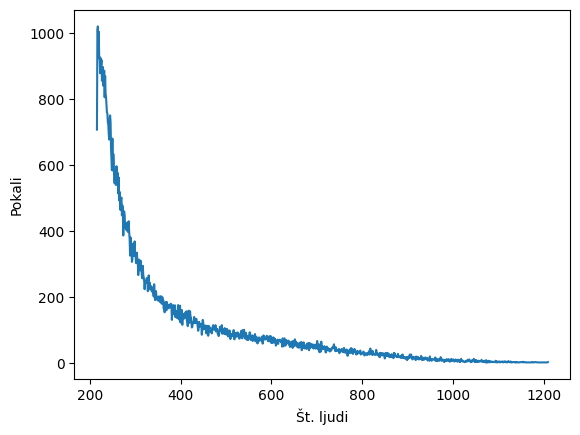

In [12]:
igralci.groupby("pokali").size().plot(xlabel="Št. ljudi",ylabel="Pokali")
print("Povprečje: %.2f" % igralci["pokali"].mean())

Lahko si tudi ogledamo, ali je kakšna zveza med uspešnostjo igralca (merjeno v pokalih) in njegovo učinkovitostjo. Igralce bomo pa omejili na zgornjih 10 tisoč, saj so sicer podatki pre več variabilni.

Povprečje: 111.81


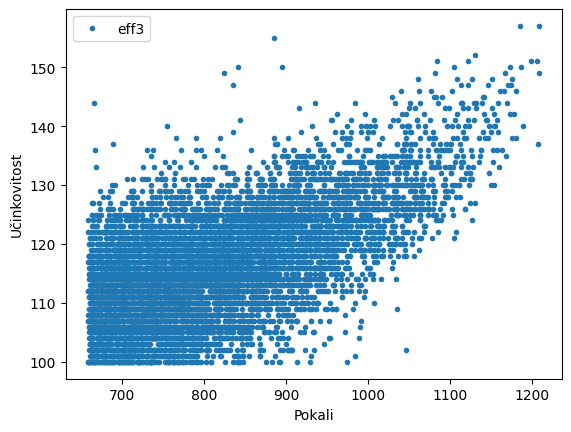

In [13]:
igralci[:10000].plot(x="pokali",y="eff3",xlabel="Pokali",ylabel="Učinkovitost",style=".")
print("Povprečje: %.2f" % igralci["eff3"].mean())

Če si namesto učinkovitosti pogledamo najhitrejši čas in omejimo le na čase, ki so manjši kot 1000 sekund, je trend precej bolj očiten.

Povprečje: 148.70


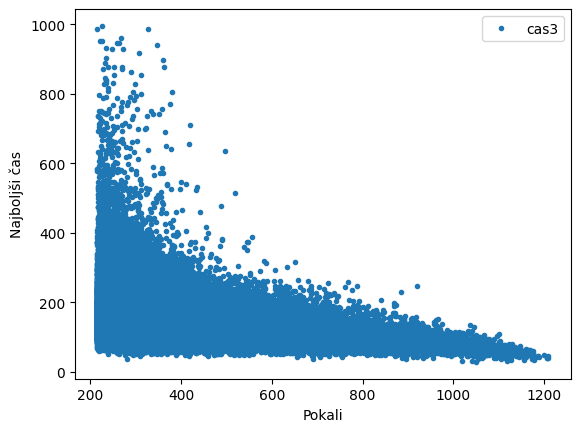

In [14]:
igralci[igralci.cas3<=1000].plot(x="pokali",y="cas3",xlabel="Pokali",ylabel="Najboljši čas",style=".")
print("Povprečje: %.2f" % igralci["cas3"].mean())

Graf relacije med pokali in izkušenostjo nam pa pove nekaj zelo očitnega: za rezultate je treba vložti čas.

Povprečje: 2859.19


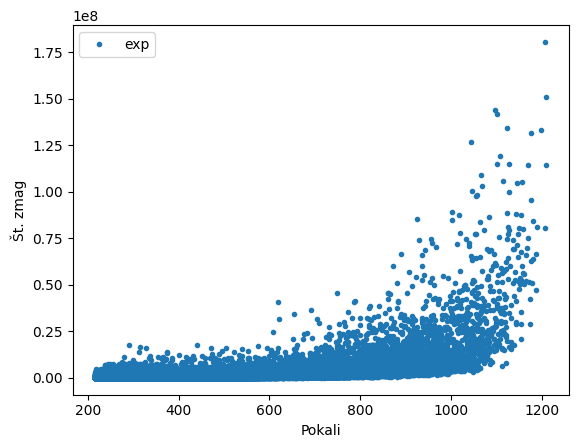

In [15]:
igralci.plot(x="pokali",y="exp",xlabel="Pokali",ylabel="Št. zmag",style=".")
print("Povprečje: %.2f" % igralci["zmage"].mean())

## Zanimivosti

Za konec si pa lahko ogledamo še najboljše igralce v vseh kategorijah.

In [16]:
for i in igralci.columns:
    if i not in ("id","ime","drzava"):
        najvec=(min if i in ("cas1","cas2","cas3","endurance") else max)(tuple(igralci[i]))
        print("%s (%d): %s" % (i, najvec, ", ".join(igralci[igralci[i]==najvec]["ime"])))

pokali (1209): SweeperZero, Md-101
zmage (520774): Raca1957
endurance (675): PQ 275
exp (180463068): sky high
cas1 (0): Md-101, Mario Pro Gamer, mikan, AlphaVorteX, gramana, FracturedAnvil, Anonymous5978127, Ko Yeong-Ju, Nekoha Shizuku, SA722, 0716!! / thank you!, Sosoru(別ゲームに逃走中), BorbityBorb, potatoes, boru, Archer0930, cat :3, eff, 我不是大佬, JZE, TheOreh1337, Nzii, sus, Cachow, Gadget, Gabriel ;), Swimispro, !HAMI, XerxthePhyrst, Thethethe, SmilingShapes, ReSeBy, 帅哥行, isabelle 🌺, kiraa96, kkmmoosshhiieerr, ‎ silhouette, ggggsusyf, MissionMatrix, Joshy_24891, retired, so easy kid, ⚡️Hikaru⚡️, Tynamo MONTHLY SUB 1 DONE, PQ 275, crl, zouhair, WU5195, Purpleworm, Crnct
cas2 (7): JZE
cas3 (29): JZE
eff1 (243): Cachow
eff2 (189): Gadget
eff3 (157): Md-101, AlphaVorteX
mastery1 (100): Mario Pro Gamer, Obelus, AlphaVorteX, Teshima M, Lucas C, Baldi99, zhu4ara, MOsweeper, Yermak, SA722, Buckethead5, iddaga, 0716!! / thank you!, Mauro Pit, KGD, diablo888, rgg, boru, Nhuwjt, Cedur (hates NF arena

In za zabavo si poglejmo še število pokalov na državo in povprečno število pokalov na prebivalca države.

In [17]:
igralci.groupby("drzava")["pokali"].sum().sort_values(ascending=False)

drzava
US    4542206
KR    4440520
JP    3867787
DE    3798979
RU    2796019
       ...   
VC        255
WS        250
BI        231
BS        224
AS        220
Name: pokali, Length: 200, dtype: int64

In [21]:
pd.Series({i:igralci.groupby("drzava")["pokali"].sum()[i]/get_population(i) for i in igralci_po_drzavah.keys() if i and get_population(i)}).sort_values(ascending=False)

FO    0.090308
EE    0.088429
KR    0.085875
HK    0.072822
LV    0.068522
        ...   
BI    0.000020
NG    0.000019
MW    0.000018
MZ    0.000016
TZ    0.000012
Length: 177, dtype: float64

Vidimo, da sta ZDA in Južna Koreja skoraj izenačeni za število pokalov in da je Estonija (EE) država, kjer ima povprečen prebivalec največ pokalov (FO so Ferski otoki, ki niso država).